<a href="https://colab.research.google.com/github/WuilsonEstacio/2020i-programs-herrc/blob/master/Distribuciones_de_probabilidad_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones de probabilidad con Python

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

#  Graficando histograma

https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

In [ ]:
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import importlib
from scipy.stats import skew, kurtosis, chi2
import pandas as pd
from scipy import stats # importando scipy.stats
import seaborn as sns # importando seaborn

# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

from numpy import random

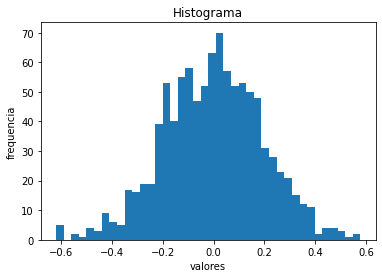

In [ ]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 40)  #plt.hist(datos, contenedores)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

# Graficando FMP

Función de Masa de Probabilidad
Otra forma de representar a las distribuciones discretas es utilizando su Función de Masa de Probabilidad o FMP, la cual relaciona cada valor con su probabilidad en lugar de su frecuencia como vimos anteriormente. Esta función es normalizada de forma tal que el valor total de probabilidad sea 1. La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. También debemos tener en cuenta que FMP funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace cada vez más pequeña y el efecto del ruido aleatorio aumenta. Veamos un ejemplo con Python.

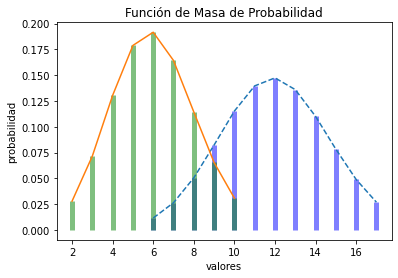

In [ ]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1), stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)  # lw grosos linea, alpha nitides linea, ymas = fmp(funcion de masa de probabilidad)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5) # def vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Función de Distribución Acumulada
(cdf)


Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la Función de Distribución Acumulada o FDA, para representar a nuestras distribuciones, tanto discretas como continuas. Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x

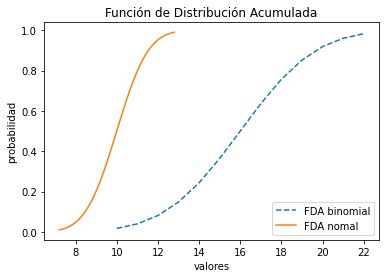

In [ ]:
# Graficando Función de Distribución Acumulada con Python
n, p = 33, 0.5 # parametros de forma de la distribución binomial
x_4 = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
x_2 = np.linspace(stats.norm(10, 1.2).ppf(0.01), stats.norm(10, 1.2).ppf(0.99), 100) # ppf (q, loc = 0, escala = 1) Función de punto porcentual (inversa de cdf- percentiles).
fda_binom = stats.binom.cdf(x_4, n, p) # Función de Distribución Acumulada cdf (x, loc = 0, escala = 1)
fda_normal = stats.norm(10, 1.2).cdf(x_2) # Función de Distribución Acumulada
plt.plot(x_4, fda_binom, '--', label='FDA binomial')
plt.plot(x_2, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

# Función de Densidad de Probabilidad

Por último, el equivalente a la FMP para distribuciones continuas es la Función de Densidad de Probabilidad o FDP. Esta función es la derivada de la Función de Distribución Acumulada. Por ejemplo, para la distribución normal que graficamos anteriormente, su FDP es la siguiente. La típica forma de campana que caracteriza a esta distribución.

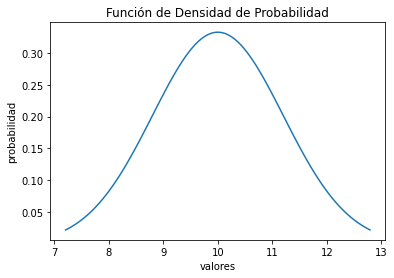

In [ ]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_2) # FDP = pdf (x, loc = 0, escala = 1) Función de densidad de probabilidad.
plt.plot(x_2, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

Text(0, 0.5, '$p$')

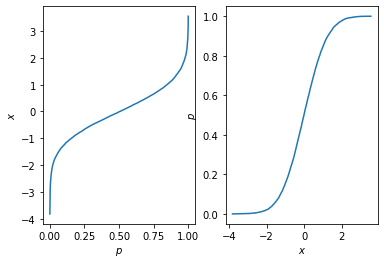

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
data = np.random.randn(10000)

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(p, data_sorted)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')

ax2 = fig.add_subplot(122)
ax2.plot(data_sorted, p)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p$')

Esto da la siguiente gráfica donde la gráfica del lado derecho es la función de distribución acumulativa tradicional. Debería reflejar el CDF del proceso detrás de los puntos, pero naturalmente no lo es siempre que el número de puntos sea finito.

# Distribuciones
# Distribuciones Discretas

Distribuciones de probabilidad con Python-Distribuciones Discretas.ipynb

Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes ver colab

https://colab.research.google.com/drive/1l1LvuKK-1umaNkU8b8LJNSZtJkYX331V#scrollTo=ui4_pngjAP0t